---

# Exploratory Data Analysis
## 12
**[15 points]** Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on your exploratory data analysis. Your goal is to identify a question or problem and to work towards solving it or providing additional information or evidence (data) related to it through your data analysis. Below, we walk through a process to follow for your analysis. Additionally, you can find an [example of a well-done exploratory data analysis here from past years](https://github.com/kylebradbury/ids705/blob/master/assignments/Assignment_1_Q12_Example.ipynb).

1. Find a dataset that interests you and relates to a question or problem that you find intriguing.
2. Describe the dataset, the source of the data, and the reason the dataset was of interest. Include a description of the features, data size, data creator and year of creation (if available), etc. What question are you hoping to answer through exploring the dataset?
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized. If the data are clean, state how you know they are clean (what did you check?).
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots. You should have at least a ~3 plots exploring the data in different ways.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this for a general audience (imagine your publishing a blog post online) - boil down your findings in a way that is accessible, but still accurate.

Here your analysis will evaluated based on:
1. Motivation: was the purpose of the choice of data clearly articulated? Why was the dataset chosen and what was the goal of the analysis?
2. Data cleaning: were any issues with the data investigated and, if found, were they resolved?
3. Quality of data exploration: were at least 4 unique plots (minimum) included and did those plots demonstrate interesting aspects of the data? Was there a clear purpose and takeaway from EACH plot? 
4. Interpretation: Were the insights revealed through the analysis and their potential implications clearly explained? Was there an overall conclusion to the analysis?

# An analysis of the individual voters in the 2016 USA Presidential Election

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
voter_data = pd.read_csv('../data/trum.csv')

In [2]:
voter_data.shape

(64600, 21)

In [3]:
voter_data.head()

,uid,state,votetrump,age,female,collegeed,racef,famincr,ideo,pid7na,...,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
0,1,New Hampshire,1.0,47,1,0,White,NaN,3.0,5.0,...,3.0,1.0,3.0,2.0,3.0,1.0,3.0,-0.191681,0.475294,-0.138715
1,2,Louisiana,1.0,22,1,0,White,6.0,3.0,4.0,...,NaN,NaN,NaN,1.0,4.0,1.0,1.0,NaN,-0.185682,-0.619427
2,3,Missouri,NaN,52,1,0,Black,4.0,5.0,1.0,...,4.0,4.0,5.0,NaN,NaN,NaN,NaN,0.573060,NaN,NaN
3,4,Alabama,NaN,28,1,0,Black,1.0,4.0,4.0,...,3.0,3.0,5.0,NaN,NaN,NaN,NaN,0.069356,NaN,NaN
4,5,Colorado,0.0,34,1,1,White,7.0,2.0,2.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,-1.130175,-1.204085,-0.138715


In [4]:
voter_data.describe()

,uid,votetrump,age,female,collegeed,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
count,64600.000000,44932.000000,64600.000000,64600.000000,64600.000000,58079.000000,59815.000000,62479.000000,64557.000000,64566.000000,63860.000000,63087.000000,52834.000000,52837.000000,52775.000000,52778.000000,64596.000000,52898.000000,52897.000000
mean,32300.500000,0.417409,47.880139,0.542864,0.362136,6.277088,3.003778,3.557611,0.281705,2.798780,2.894284,4.329180,1.681114,2.667827,2.162804,2.285081,-0.000584,-0.000091,0.000061
std,18648.558032,0.493137,16.832794,0.498163,0.480622,3.184442,1.084743,2.131645,0.449834,1.147145,1.691721,2.339252,0.956034,1.445813,1.140200,1.219669,0.934339,0.805956,0.473045
min,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.584900,-1.204085,-0.619427
25%,16150.750000,0.000000,33.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,-0.634853,-0.643632,-0.619427
50%,32300.500000,0.000000,49.000000,1.000000,0.000000,6.000000,3.000000,4.000000,0.000000,3.000000,2.000000,5.000000,1.000000,2.000000,2.000000,2.000000,0.060855,-0.005524,0.052228
75%,48450.250000,1.000000,61.000000,1.000000,1.000000,9.000000,4.000000,5.000000,1.000000,4.000000,5.000000,7.000000,2.000000,4.000000,3.000000,3.000000,0.746089,0.508762,0.271789
max,64600.000000,1.000000,99.000000,1.000000,1.000000,12.000000,5.000000,7.000000,1.000000,4.000000,6.000000,7.000000,5.000000,5.000000,5.000000,5.000000,1.696614,1.841226,1.386214


In [5]:
voter_data.isnull().sum()

uid                0
state              0
votetrump      19668
age                0
female             0
collegeed          0
racef              0
famincr         6521
ideo            4785
pid7na          2121
bornagain         43
religimp          34
churchatd        740
prayerfreq      1513
angryracism    11766
whiteadv       11763
fearraces      11825
racerare       11822
lrelig             4
lcograc        11702
lemprac        11703
dtype: int64

In [6]:
voters_trump = voter_data[voter_data['votetrump'] == 1]
voters_clinton = voter_data[voter_data['votetrump'] == 0]
# ratio
len(voters_clinton) / len(voters_trump)

1.3957344708077846

In [7]:
# drop the rows with missing values to ease the analysis, then reset the index (also dropping uid column which is not needed)
voter_data = voter_data.drop(['uid'], axis=1)
voter_data = voter_data.dropna().reset_index(drop=True)

In [8]:
# correlation matrix
corr = voter_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,votetrump,age,female,collegeed,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
votetrump,1.000000,0.178944,-0.083135,-0.154648,-0.001468,0.602090,0.725108,0.232976,0.285500,0.204644,0.244867,0.402110,0.621890,0.119803,0.430411,0.285662,0.586793,0.342830
age,0.178944,1.000000,-0.104532,-0.162688,-0.039458,0.175660,0.116392,0.026462,0.134597,0.051431,0.155467,0.094603,0.142460,0.029308,0.018825,0.137904,0.086791,0.081969
female,-0.083135,-0.104532,1.000000,-0.074730,-0.164147,-0.075869,-0.079924,0.044591,0.095083,0.030852,0.149461,-0.151323,-0.069596,-0.013839,-0.128813,0.100999,-0.115387,-0.102173
collegeed,-0.154648,-0.162688,-0.074730,1.000000,0.342617,-0.136217,-0.097997,-0.108084,-0.098219,0.034394,-0.093476,-0.038620,-0.182693,-0.050997,-0.047395,-0.078797,-0.127325,-0.060474
famincr,-0.001468,-0.039458,-0.164147,0.342617,1.000000,-0.005753,0.030230,-0.107746,-0.083020,0.016334,-0.094373,0.037082,-0.037207,-0.034933,0.036952,-0.075978,0.001642,0.003548
ideo,0.602090,0.175660,-0.075869,-0.136217,-0.005753,1.000000,0.660380,0.318684,0.398054,0.336864,0.343934,0.348343,0.535809,0.136467,0.415267,0.415803,0.548518,0.324524
pid7na,0.725108,0.116392,-0.079924,-0.097997,0.030230,0.660380,1.000000,0.214554,0.258614,0.206662,0.223600,0.359251,0.565448,0.092847,0.390621,0.266048,0.542775,0.305690
bornagain,0.232976,0.026462,0.044591,-0.108084,-0.107746,0.318684,0.214554,1.000000,0.501775,0.476662,0.470521,0.058833,0.173916,0.073947,0.155282,0.539588,0.185876,0.087279
religimp,0.285500,0.134597,0.095083,-0.098219,-0.083020,0.398054,0.258614,0.501775,1.000000,0.717759,0.780460,0.070658,0.237998,0.098159,0.189924,0.949882,0.247621,0.113338
churchatd,0.204644,0.051431,0.030852,0.034394,0.016334,0.336864,0.206662,0.476662,0.717759,1.000000,0.635184,0.050009,0.146687,0.067563,0.160891,0.826322,0.181108,0.079849


The above correlation matrix shows the correlation between the different features of the dataset. The features are as follows:

| Column Name  | Description                                                                                     |
|--------------|-------------------------------------------------------------------------------------------------|
| `state`      | A character vector for the state in which the respondent resides                                 |
| `votetrump`  | A numeric that equals 1 if the respondent says s/he voted for Trump in 2016                      |
| `age`        | A numeric vector for age, roughly calculated as 2016 - birthyr                                   |
| `female`     | A numeric that equals 1 if the respondent is a woman                                             |
| `collegeed`  | A numeric vector that equals 1 if the respondent says s/he has a college degree                  |
| `racef`      | A character vector for the race of the respondent                                                |
| `famincr`    | A numeric vector for the respondent's household income, ranging from 1 to 12                     |
| `ideo`       | A numeric vector for the respondent's ideology, ranging from 1 (very liberal) to 5 (very conservative) |
| `pid7na`     | A numeric vector for the respondent's partisanship, ranging from 1 to 7                          |
| `bornagain`  | A numeric vector for whether the respondent self-identifies as a born-again Christian            |
| `religimp`   | A numeric vector for the importance of religion to the respondent, ranging from 1 to 4           |
| `churchatd`  | A numeric vector for the extent of church attendance, ranging from 1 to 6                        |
| `prayerfreq` | A numeric vector for the frequency of prayer, ranging from 1 to 7                                |
| `angryracism`| A numeric vector for how angry the respondent is that racism exists, ranging from 1 to 5          |
| `whiteadv`   | A numeric vector for agreement with the statement that white people have advantages, ranging from 1 to 5  |
| `fearraces`  | A numeric vector for agreement with the statement that the respondent fears other races, ranging from 1 to 5 |
| `racerare`   | A numeric vector for agreement with the statement that racism is rare in the U.S., ranging from 1 to 5   |
| `lrelig`     | A numeric vector that serves as a latent estimate for religiosity                                |
| `lcograc`    | A numeric vector that serves as a latent estimate for cognitive racism                           |
| `lemprac`    | A numeric vector that serves as a latent estimate for empathetic racism                          |

We can now explore the relation between different factors of a song and the amount of streams it gets

In [9]:
def scatterplot_func(df, x, y, title, xlabel, ylabel):
    plt.scatter(df[x], df[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


def barchart_func(df, x, y, title, xlabel, ylabel):
    plt.bar(df[x], df[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

<AxesSubplot:title={'center':'Percentage of college educated by state'}, xlabel='state'>

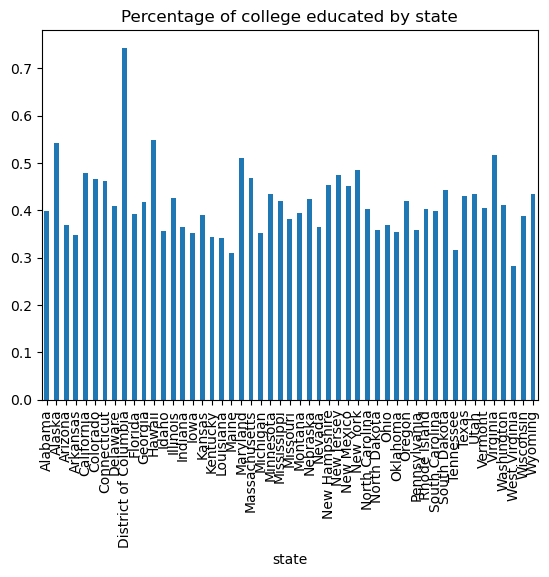

In [10]:
# bar chart of percentage of collegeed by state
voter_data.groupby('state')['collegeed'].mean().plot(kind='bar', title='Percentage of college educated by state')

In [11]:
voter_data['racef'].unique()

array(['White', 'Asian', 'Mixed', 'Other', 'Native American', 'Hispanic',
       'Black', 'Middle Eastern'], dtype=object)

In [12]:
voter_data.groupby('votetrump').mean()

,age,female,collegeed,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
votetrump,,,,,,,,,,,,,,,,,
0.0,49.158851,0.570343,0.480824,6.743537,2.448766,2.264197,0.186862,2.503215,2.609280,3.869880,1.341082,1.85810,2.014298,1.828425,-0.233186,-0.430649,-0.151925
1.0,54.926580,0.485993,0.325668,6.734202,3.811075,5.531531,0.398046,3.181107,3.317329,5.041629,2.117590,3.70645,2.290489,2.912378,0.321667,0.558816,0.176028


In [13]:
voters_trump = voter_data[voter_data['votetrump'] == 1]
voters_clinton = voter_data[voter_data['votetrump'] == 0]

In [14]:
# ratio
len(voters_clinton) / len(voters_trump)

1.4489250814332248